<a href="https://colab.research.google.com/github/Ans365332/6may-file-example/blob/main/test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You have to apply All Feature Enginnering work step by step :
- StandardScaler,
- MinMaxScaler,
- All type Encoding ,
- Column Transformer,
- Outlier Hnadling ,
- CCA  if there are missing data

In [1]:
import pandas as pd

In [31]:
df=pd.read_csv('/content/ecommerce_customer_churn_dataset - ecommerce_customer_churn_dataset.csv')
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  int64  
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [33]:
df.isnull().sum()

,0
Age,2495
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,3399
Pages_Per_Session,3000
Cart_Abandonment_Rate,0
Wishlist_Items,4000


# CCA

In [34]:
df.isnull().mean()*100

,0
Age,4.990
Gender,0.000
Country,0.000
City,0.000
Membership_Years,0.000
Login_Frequency,0.000
Session_Duration_Avg,6.798
Pages_Per_Session,6.000
Cart_Abandonment_Rate,0.000
Wishlist_Items,8.000


In [35]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.20
      and df[var].isnull().mean()>0]
cols

['Age',
 'Session_Duration_Avg',
 'Pages_Per_Session',
 'Wishlist_Items',
 'Days_Since_Last_Purchase',
 'Discount_Usage_Rate',
 'Returns_Rate',
 'Email_Open_Rate',
 'Customer_Service_Calls',
 'Product_Reviews_Written',
 'Social_Media_Engagement_Score',
 'Mobile_App_Usage',
 'Payment_Method_Diversity',
 'Credit_Balance']

In [36]:
len(df[cols].dropna())/len(df)

0.35966

In [37]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((50000, 25), (17983, 14))

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

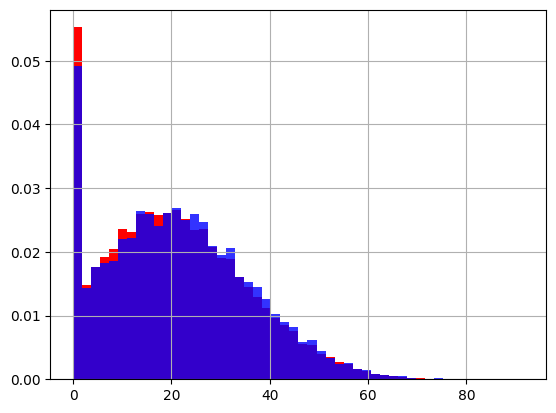

In [39]:
flg=plt.figure()
ax=flg.add_subplot(111)

# orignal data
df['Email_Open_Rate'].hist(bins=50,ax=ax,density=True,color='red')

# CCA data
new_df['Email_Open_Rate'].hist(bins=50,ax=ax,density=True,color='blue',alpha=0.8)


# Standard sclar

In [40]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [41]:
df=df.dropna()

In [42]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
City,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,0
Pages_Per_Session,0
Cart_Abandonment_Rate,0
Wishlist_Items,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17983 entries, 0 to 49994
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            17983 non-null  float64
 1   Gender                         17983 non-null  object 
 2   Country                        17983 non-null  object 
 3   City                           17983 non-null  object 
 4   Membership_Years               17983 non-null  float64
 5   Login_Frequency                17983 non-null  int64  
 6   Session_Duration_Avg           17983 non-null  float64
 7   Pages_Per_Session              17983 non-null  float64
 8   Cart_Abandonment_Rate          17983 non-null  float64
 9   Wishlist_Items                 17983 non-null  float64
 10  Total_Purchases                17983 non-null  float64
 11  Average_Order_Value            17983 non-null  float64
 12  Days_Since_Last_Purchase       17983 non-null  floa

In [44]:
df['Signup_Quarter'].value_counts()

,count
Signup_Quarter,
Q1,4576
Q3,4552
Q2,4483
Q4,4372


In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [45]:
df['Gender']=lb.fit_transform(df['Gender'])
df['City']=lb.fit_transform(df['City'])
df['Country']=lb.fit_transform(df['Country'])
df['Signup_Quarter']=lb.fit_transform(df['Signup_Quarter'])

In [46]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,1,2,21,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,0
3,56.0,0,7,27,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,0
5,35.0,1,5,35,3.5,6,21.9,6.9,74.4,0.0,...,16.0,8.0,2.0,14.3,11.2,2.0,1995.43,2418.0,1,0
6,56.0,1,3,2,1.9,24,46.4,13.9,36.2,5.0,...,35.5,4.0,6.0,68.8,42.9,5.0,3003.57,2657.0,0,0
10,32.0,1,6,11,0.9,0,12.3,2.9,73.5,0.0,...,0.0,11.0,2.0,17.0,8.0,1.0,599.41,498.0,1,1


In [47]:
x=df.drop('Churned',axis=1)
y=df['Churned']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [50]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [51]:
x_train_new=pd.DataFrame(x_train_sc,columns=x_train.columns)

In [53]:
import numpy as np

In [54]:
np.round(x_train_new.describe(),2)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Signup_Quarter
count,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,...,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00
mean,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.73,-0.97,-1.77,-1.77,-1.40,-1.58,-2.49,-2.13,-3.43,-1.41,...,-1.08,-1.52,-2.09,-1.27,-1.48,-2.13,-1.22,-1.62,-1.66,-1.33
25%,-0.74,-0.97,-0.98,-0.85,-0.77,-0.69,-0.74,-0.73,-0.67,-0.79,...,-0.63,-0.76,-0.58,-0.85,-0.77,-0.74,-0.32,-0.72,-0.74,-1.33
50%,0.01,-0.97,0.21,-0.12,-0.24,-0.06,-0.07,-0.07,0.03,-0.17,...,-0.20,-0.07,-0.20,-0.02,-0.09,-0.05,-0.32,-0.21,-0.04,-0.44
75%,0.67,0.91,1.01,0.80,0.53,0.71,0.65,0.67,0.71,0.46,...,0.40,0.67,0.56,0.40,0.68,0.66,0.58,0.49,0.68,0.46
max,13.44,2.79,1.01,1.81,3.38,4.01,3.75,3.72,5.06,5.74,...,15.09,4.88,5.10,7.52,3.32,4.39,2.39,8.12,4.13,1.36


# MinMax Scalar

In [55]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,1,2,21,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,0
3,56.0,0,7,27,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,0
5,35.0,1,5,35,3.5,6,21.9,6.9,74.4,0.0,...,16.0,8.0,2.0,14.3,11.2,2.0,1995.43,2418.0,1,0
6,56.0,1,3,2,1.9,24,46.4,13.9,36.2,5.0,...,35.5,4.0,6.0,68.8,42.9,5.0,3003.57,2657.0,0,0
10,32.0,1,6,11,0.9,0,12.3,2.9,73.5,0.0,...,0.0,11.0,2.0,17.0,8.0,1.0,599.41,498.0,1,1


In [56]:
a=df

In [57]:
x=a.drop('Churned',axis=1)
y=a['Churned']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [59]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [60]:
x_train_mm=mm.fit_transform(x_train)
x_test_mm=mm.transform(x_test)

In [61]:
x_train_new=pd.DataFrame(x_train_mm,columns=x_train.columns)

In [62]:
np.round(x_train_new.describe(),2)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Signup_Quarter
count,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,...,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00,14386.00
mean,0.17,0.26,0.63,0.49,0.29,0.28,0.41,0.36,0.40,0.20,...,0.07,0.24,0.33,0.14,0.31,0.33,0.34,0.17,0.29,0.50
std,0.06,0.27,0.36,0.28,0.21,0.18,0.16,0.17,0.12,0.14,...,0.06,0.16,0.16,0.11,0.21,0.15,0.28,0.10,0.17,0.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.12,0.00,0.29,0.26,0.13,0.16,0.29,0.24,0.32,0.09,...,0.03,0.12,0.24,0.05,0.15,0.21,0.25,0.09,0.16,0.00
50%,0.17,0.00,0.71,0.46,0.24,0.27,0.40,0.35,0.41,0.17,...,0.05,0.23,0.29,0.14,0.29,0.32,0.25,0.14,0.28,0.33
75%,0.21,0.50,1.00,0.72,0.40,0.41,0.52,0.48,0.49,0.26,...,0.09,0.34,0.41,0.19,0.45,0.43,0.50,0.22,0.40,0.67
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Outliers

In [63]:
b=df

In [64]:
b.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,1,2,21,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,0
3,56.0,0,7,27,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,0
5,35.0,1,5,35,3.5,6,21.9,6.9,74.4,0.0,...,16.0,8.0,2.0,14.3,11.2,2.0,1995.43,2418.0,1,0
6,56.0,1,3,2,1.9,24,46.4,13.9,36.2,5.0,...,35.5,4.0,6.0,68.8,42.9,5.0,3003.57,2657.0,0,0
10,32.0,1,6,11,0.9,0,12.3,2.9,73.5,0.0,...,0.0,11.0,2.0,17.0,8.0,1.0,599.41,498.0,1,1


In [66]:
b['Age'].describe()

,Age
count,17983.000000
mean,37.860757
std,11.958166
min,5.000000
25%,29.000000
50%,38.000000
75%,46.000000
max,200.000000


<Axes: xlabel='Age'>

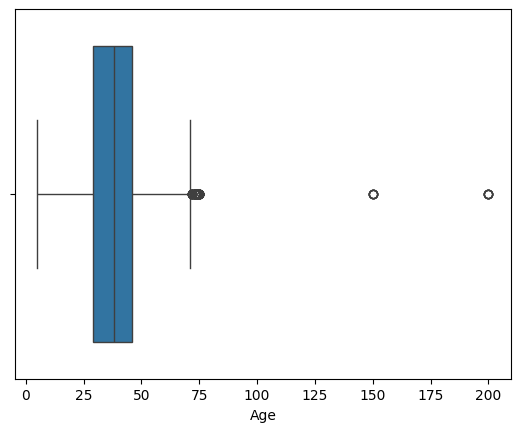

In [67]:
sns.boxplot(x=b['Age'])

In [77]:
percentile25=b['Age'].quantile(0.25)
percentile75=b['Age'].quantile(0.75)

In [78]:
percentile25

np.float64(29.0)

In [79]:
percentile75

np.float64(46.0)

In [80]:
IQR=percentile75-percentile25
IQR

np.float64(17.0)

In [81]:
upper_limit = percentile75 + 1.5 * IQR
upper_limit

np.float64(71.5)

In [82]:
lower_limit = percentile25 - 1.5 * IQR
lower_limit

np.float64(3.5)

In [ ]:
# trimming-->

In [83]:
b[b['Age']>upper_limit]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
209,75.0,1,7,33,1.0,6,28.3,4.9,60.4,2.0,...,33.5,4.0,1.0,5.9,16.0,4.0,595.05,3097.0,0,0
478,74.0,1,4,9,3.6,24,37.9,9.4,37.8,10.0,...,40.9,3.0,3.0,46.6,23.8,3.0,1403.40,2295.0,0,3
1615,75.0,0,0,34,2.7,13,24.4,12.8,48.5,4.0,...,25.0,6.0,1.0,47.1,22.9,2.0,1946.89,4669.0,1,2
2521,73.0,1,3,12,9.2,26,52.6,17.1,13.3,10.0,...,36.7,1.0,6.0,68.4,41.0,2.0,1465.13,2003.0,0,0
2895,75.0,0,7,18,4.0,8,19.7,5.4,68.5,3.0,...,0.0,6.0,3.0,25.6,15.7,3.0,660.84,306.0,0,2
3716,75.0,0,7,7,5.1,12,34.0,7.7,46.8,7.0,...,24.6,8.0,1.0,41.0,18.9,4.0,1727.43,776.0,0,1
4997,75.0,0,1,23,1.6,12,22.4,12.4,51.1,8.0,...,38.6,2.0,1.0,64.9,24.4,2.0,1083.21,3693.0,0,0
5157,73.0,0,3,25,2.6,8,19.4,9.4,51.5,5.0,...,10.9,7.0,0.0,4.6,14.1,1.0,1088.77,1327.0,0,1
5224,73.0,0,1,30,1.1,26,34.7,13.2,39.9,6.0,...,16.6,3.0,5.0,31.6,28.7,4.0,1955.64,1965.0,0,0
5796,75.0,1,7,18,4.7,9,31.6,10.6,46.3,3.0,...,21.8,6.0,4.0,27.3,31.9,4.0,780.88,2707.0,0,2


In [84]:
b[b['Age']<lower_limit]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter


In [85]:
new_df=b[(b['Age']<upper_limit)]

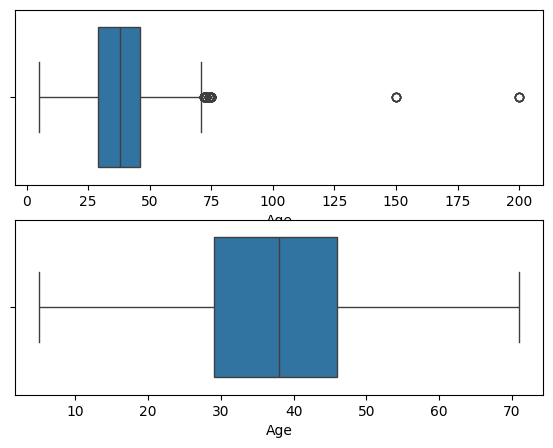

In [86]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x=b['Age'])

plt.subplot(224)
sns.boxplot(x=new_df['Age'])
plt.show()

In [ ]:
# by capping-->

In [87]:
new_df_cap=b.copy()

In [88]:
new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,
    upper_limit,

    np.where(
        new_df_cap['Age'] < lower_limit,
        lower_limit,
        new_df_cap['Age']
    )

)

In [89]:
new_df_cap

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,1,2,21,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,0
3,56.0,0,7,27,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,0
5,35.0,1,5,35,3.5,6,21.9,6.9,74.4,0.0,...,16.0,8.0,2.0,14.3,11.2,2.0,1995.43,2418.0,1,0
6,56.0,1,3,2,1.9,24,46.4,13.9,36.2,5.0,...,35.5,4.0,6.0,68.8,42.9,5.0,3003.57,2657.0,0,0
10,32.0,1,6,11,0.9,0,12.3,2.9,73.5,0.0,...,0.0,11.0,2.0,17.0,8.0,1.0,599.41,498.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,40.0,1,7,33,4.7,6,30.2,7.5,59.3,4.0,...,14.5,6.0,2.0,16.9,11.7,1.0,747.57,1654.0,0,3
49987,37.0,0,7,27,5.4,12,31.1,5.7,80.7,3.0,...,7.3,4.0,3.0,19.0,23.1,3.0,1131.42,0.0,0,2
49991,29.0,1,7,7,4.9,12,40.1,10.2,40.7,9.0,...,12.6,3.0,4.0,51.3,25.6,3.0,1257.02,0.0,0,3
49993,56.0,0,1,5,2.0,14,35.5,8.9,52.9,12.0,...,40.5,5.0,2.0,35.4,18.3,3.0,1581.65,2732.0,0,2


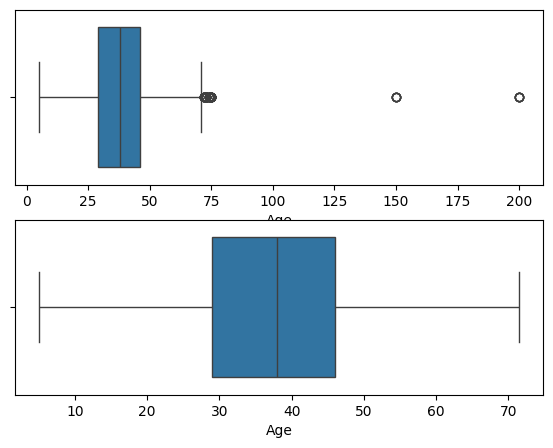

In [90]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x=b['Age'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['Age'])
plt.show()

# Encoding

In [92]:
data=pd.read_csv('/content/ecommerce_customer_churn_dataset - ecommerce_customer_churn_dataset.csv')
data.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [101]:
data['Gender'].value_counts()

,count
Gender,
Female,25116
Male,23947
Other,937


In [96]:
data=data.drop(columns=['City'])

In [102]:
# Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Male','Female','Other'],
 ['USA','UK','Canada','Germany','Australia','France','India','Japan'],
                              ['Q3','Q2','Q4','Q1']])


In [103]:
data_a=oe.fit_transform(data[['Gender','Country','Signup_Quarter']])

In [104]:
new_data=pd.DataFrame(data_a,columns=['Gender','Country','Signup_Quarter'])

In [105]:
new_data.head()

,Gender,Country,Signup_Quarter
0,0.0,5.0,3.0
1,0.0,1.0,2.0
2,1.0,2.0,2.0
3,1.0,0.0,3.0
4,0.0,6.0,2.0


In [106]:
# One hot encoder

In [107]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)


In [108]:
ohe.fit_transform(data[['Gender','Country','Signup_Quarter']])

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [109]:
# get dummies

a=pd.get_dummies(data[['Gender','Country','Signup_Quarter']],drop_first=True)

In [110]:
a = a.astype(int)

In [111]:
a

,Gender_Male,Gender_Other,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA,Signup_Quarter_Q2,Signup_Quarter_Q3,Signup_Quarter_Q4
0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,1,1,0,0
49996,1,0,0,0,0,0,0,0,1,0,1,0
49997,0,0,0,0,0,0,0,0,1,0,0,0
49998,0,0,0,0,0,0,0,0,1,1,0,0


# Column Transformer

In [123]:
data.head()

,Age,Gender,Country,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,2.9,14,27.4,6.0,50.6,3.0,9.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,1.6,15,42.7,10.3,37.7,1.0,19.5,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,2.9,10,24.8,1.6,70.9,1.0,9.1,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,2.6,10,38.4,14.8,41.7,9.0,15.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,3.1,29,51.4,NaN,19.1,9.0,32.5,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [124]:
x=data.drop(columns=['Churned'])
y=data['Churned']

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [118]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['Age','Salary']),
    ('col1', OrdinalEncoder(categories=[['Male','Female','Other']]),['Gender']),
    ('col2', OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32),['Country']),
    ('col3', OrdinalEncoder(categories=[['Q3','Q2','Q4','Q1']]),['Signup_Quarter'])],
                                remainder='passthrough')

In [119]:
transformer.fit_transform(x_train).shape

(40000, 29)

In [120]:
transformer.fit_transform(x_test).shape

(10000, 29)

In [121]:
# without column transformer

data.head()

,Age,Gender,Country,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,2.9,14,27.4,6.0,50.6,3.0,9.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,1.6,15,42.7,10.3,37.7,1.0,19.5,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,2.9,10,24.8,1.6,70.9,1.0,9.1,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,2.6,10,38.4,14.8,41.7,9.0,15.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,3.1,29,51.4,NaN,19.1,9.0,32.5,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [122]:
data.isnull().sum()

,0
Age,2495
Gender,0
Country,0
Membership_Years,0
Login_Frequency,0
Session_Duration_Avg,3399
Pages_Per_Session,3000
Cart_Abandonment_Rate,0
Wishlist_Items,4000
Total_Purchases,0
